## Analyzing the Stroop Effect
*Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.*


> (1) What is the independent variable? What is the dependent variable?

**-- Answer --**

***The independent variable is congruency - a categorical variable.***

***The dependent variable is the time it takes a participant to answer (response time)***

> (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**--Answer--**

***Null hypothesis*** : there is no difference in the response time between congruent words and incongruent words. Since the response times are paired (i.e. congruent and incongruent for each participant), we can formulate the null mypothesis in terms of the mean difference (μ <sub>d</sub>) in the response time :

$H_{0} : \mu_{d} = 0 $

with μ <sub>d</sub> as the mean difference between the response time for incongruent word and the response time for congruent words

***Alternative hypothesis*** : there is a statistically significant difference in the response time between congruent words and incongruent words: 

$H_{1} : \mu_{d} \neq 0 $

Since the response times for congruent and incongruent words are from the same participants, I would expect to do a  ***paired t test*** to determine whether or not to reject the null hypothesis

> (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('stroopdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
#Let's calculate the difference in the response time between congruent and incongruent words:
df['difference']=df.Incongruent - df.Congruent

#check the first few rows
df.head()

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [4]:
#Calculate summary stats for the 3 columns
df.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


The maximum response time for incongruent words seems pretty large. In fact values over 30s could be outliers, let's have a look at these:

In [5]:
df[df['Incongruent']>30]

,Congruent,Incongruent,difference
14,18.200,35.255,17.055
19,12.369,34.288,21.919


In [6]:
#maximum value if calculated as median + 1.5 x IQR
df.difference.describe()[5] + 1.5* (df.difference.describe()[6]-df.difference.describe()[4])

17.586000000000002

**-- Answer --**

The **mean** (congruent: 14.05s, incongruent: 22.02s) and the **median** (congruent: 14.36s, incongruent: 21.0175s) response times are relatively close. This is indicative of a symmetric distribution. 

However two response times for incongruent words over 30s could be outliers - they are certainly further from the median than 1.5x the interquartile range. This is also seen in the difference between the two response times.

The **standard deviation** of the response times for congruent and incongruent words are 3.56s and 4.80s, respectively.

> (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

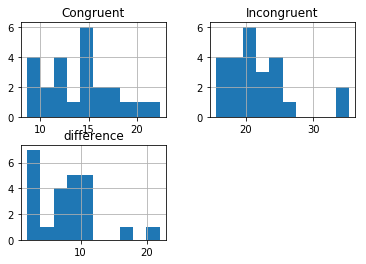

In [7]:
# Build the visualizations here
df.hist();

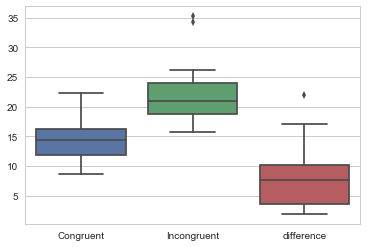

In [8]:
sns.set(style="whitegrid")
sns.boxplot(data=df);

**--Answer--**

The histograms of the response times visualise that we are dealing with a relatively small data set, with the mode in the histograms only containing 6 data points. The histogram for the response time of incongruent words has 2 measurements above 30s that can be classified as outliers given their distance form the rest of the data. The same two measurements are apparent as outliers in the histogram for the difference in response times.

The box plots of the response times shows that, although the median response times clearly differ, there is substantial overlap between the range of measurements (i.e. the whiskers in the box plot). This is often seen in samples between which there is no statistical difference. The range of the difference in response times is also surprisingly large.


> (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**--Answer--**

The appropriate test for this type of experiment, in which two conditions (response time with congruent vs incongruent words) are measured in the same individuals is a paired t-test. The scipy.stats library provides a function to carry out a paired t-test:

In [9]:
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The value of the t statistic is -8.02, while the p-value of 4.1 e-8 is far below the commonly used p-value of 0.05. On this basis, the result from the t-test could be interpreted to reject the null hypothesis. 

However, the paired t-test makes three assumptions: (from https://pythonfordatascience.org/paired-samples-t-test-python/)

(1) that the dependent variable is continuous 

(2) that the dependent variable is normally distributed

(3) that the dependent variable has no outliers.


While (1) is the case here, I need to test for (2) and (3). One way to look at the distribution of a variable is the quantile-quantile plot:

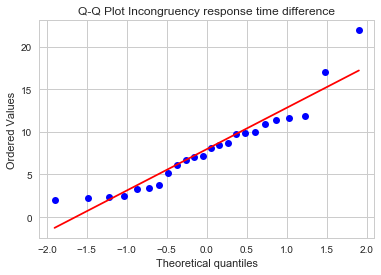

In [10]:
stats.probplot(df['difference'], plot= plt)
plt.title('Q-Q Plot Incongruency response time difference');

The Q-Q plot implies that a normal distriution is questionable in this case, in particular the two longest response time differences may be outliers, as already previously discussed. In addition, the two shortest response time differences don't fit well with a normal distribution, and it is noticeable how the first 4 response time differences are surprisingly small.
One approach to dealing with the issue of the distribution and outliers is to repeat the paired t-test on a trimmed dataset (see https://stats.stackexchange.com/a/21210), in which the bottom 2 and top 2 datapoints have been removed:

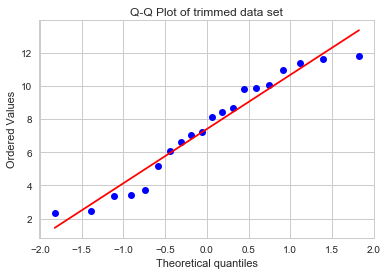

In [11]:
df_trimmed = df.sort_values(by=['difference'])[2:22] #sort then remove 2 first and two last data points
stats.probplot(df_trimmed['difference'], plot= plt)
plt.title('Q-Q Plot of trimmed data set');

In [12]:
#repeat the paired t-test on trimmed data set:
stats.ttest_rel(df_trimmed['Congruent'], df_trimmed['Incongruent'])

Ttest_relResult(statistic=-10.435256611865332, pvalue=2.6381219601801997e-09)

Despite the smaller data set, the result of the t-test is a smaller p-value. An alternative possibility is to carry out a Wilcoxon sign ranked test, which makes no assumptions about the distribution of the dependent variable:

In [13]:
stats.wilcoxon(df['difference']) #https://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/

WilcoxonResult(statistic=0.0, pvalue=1.821529714896801e-05)

Again, the p-value is well below the standard 0.05 used in hypothesis testing. On the whole these two results imply that the finding for the first t-test holds and that we can reject the null hypothesis with a high level of confidence. 
On other words, there is a statistically significant difference in the reponse time between congruent and incongruent words. To calculate the mean difference and its 95% confidence limits:

In [14]:
df.difference.mean()

7.964791666666667

In [15]:
stats.norm.interval(0.95, loc=df.difference.mean(), scale=df.difference.std()) #95% CI


(-1.5700938686583488, 17.49967720199168)

The mean response time is 8.00s longer with incongruent word, with CI -1.5 to 17.5. This 95% CI interval is very large.

Do these results match my expectations? Given the large CI of the difference, the very significant overlap seen in the boxplot with congruent and incongruent words, and the presence of outliers, it is somewhat surprising that we obtain such low p-values in the t-tests performed. 

However this goes the show the power of using matched data, in which the same individuals are used to compare two conditions. Even though there will be a multitide of differences between individuals affecting their response time (their tiredness or emotional state on the day, their reading speed, their thoroughness in following the experimental instructions, etc etc), the experiment focuses on a single effect, the difference in response time. Thus, while the variance in the response times is quite large, as visualised in the box plot, we can say with confidence that incongruency increases it.

In addition, the large variation in response times is due to the precise way the experiment is conducted. The time measured is the sum of the response times for a large number of words displayed, rather than the response time for a single word - possibly amplifying the effect. The 2/4 shortest response time differences - shorter than would be expected from a normal distribution - could be the result of participants who misunderstood the instructions and are simply reading the word rather than determining the colour. Similarly the 2 outliers with unexpectedly larger response time differences could be in some way different. For example,
they may be red-green colour-blind (as around 10% of men are) and struggle much more with distinguishing red and green words. From the description of the data set it is not clear if there are experimental controls to deal with such issues.

> (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**--Answer--**

According to the Wikipedia article on the Stroop effect, there are several theories. https://en.wikipedia.org/wiki/Stroop_effect
One theory (Processing speed) posits that word processing is significantly faster than color processing, while another (Selective attention) holds that color recognition requires more attention than word recognition.

The Automaticity theory appears the most plausible to me. Due to habitual reading, the brain automatically understands the meaning of words - but color recognition is not an automatic process since it is much less a part of daily life.

An alternative experiment could consist of, again, asking participants to name the colour of displayed word, but this time, the first half and the second half of a word would be different colours. One of those colours would be incongruent (randomly either the first or second). The same words would be displayed twice, the first time the participants would need to determine the first half, the second time the second half - perhaps by typing the first letter of the colour. In addition to words for a colour, other words could be used, which would be 'neutral' rather than incongruent, and function as a control to determine how long it takes a participant to determine the colour of printed letters. Since in this experiment the same sequence of words would be displayed twice, a difference in response time could be determined for each word, and the effect of e.g. long vs short words would be eliminated, also the effect of red-green colour blindness may become discernable. 

## References
List of sources used for this project (links are also included above):
1.  Assumptions of paired t-test: (from https://pythonfordatascience.org/paired-samples-t-test-python/)
* Using a trimmed dataset for a paired t-test: see https://stats.stackexchange.com/a/21210
* The wilcoxon test #https://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/
* Stroop effect: https://en.wikipedia.org/wiki/Stroop_effect 
* https://faculty.washington.edu/chudler/words.html